In [1]:
###05EX_PANDAS

#question 1

import pandas as pd
df = pd.read_csv('data/data_000637.txt',nrows=25000)
print(df.head()) 
print(df.shape)

   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25
(25000, 6)


In [2]:
###question 2

import pandas as pd
df = pd.read_csv('data/data_000637.txt')
est_df= df["BX_COUNTER"]
est_bx = max(est_df)
print( est_bx)


3563


In [3]:
###question 3

import pandas as pd
df = pd.read_csv('data/data_000637.txt',nrows=25000)
x = df["BX_COUNTER"]
est_x = max(x)
df["abs_time_in_ns"] = df['TDC_MEAS'].transform(lambda x: x * 25/30) + df['BX_COUNTER'].transform(lambda x: x * 25) +df['ORBIT_CNT'].transform(lambda x: x * est_bx * 25)
print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         1     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
24995     1     0           72  3869200416        1932        14   
24996     1     0           54  3869200416        1932        28   
24997     1     1           64  3869200416        2018        20   
24998     1     1            6  3869200416        2098         4   
24999     1     1            3  3869200416        2101         6   

       abs_time_in_ns  
0        3.446490e+14  
1        3.446490e+14  
2        3.446490e+14  
3        3.446490e+14  
4        3.446490e+14  
...               ...  
24995    3.4464

In [4]:
###question 4
import datetime as dt
import pandas as pd
x = df["BX_COUNTER"]
est_x = max(x)
df = pd.read_csv('data/data_000637.txt',nrows=25000)
begin_time = dt.datetime.now()
print(begin_time)
time = df['TDC_MEAS'] *(25/30) + df['BX_COUNTER'] * 25 + df['ORBIT_CNT']*est_x*25
end_time = dt.datetime.now()
print(end_time)
print((end_time - begin_time))


2023-12-12 15:48:39.239881
2023-12-12 15:48:39.244390
0:00:00.004509


In [5]:
###question 5
import numpy as np
import pandas as pd
df = pd.read_csv('data/data_000637.txt',nrows=25000)
y=  df.groupby('TDC_CHANNEL').sum().sort_values(by = ['HEAD']).iloc[-3:]
print(y)

             HEAD  FPGA      ORBIT_CNT  BX_COUNTER  TDC_MEAS
TDC_CHANNEL                                                 
63           1220    13  4720424355236     2194819     18114
64           1261    29  4879061570586     2306691     18224
139          2102   634  8133059010628     3732404         0


In [6]:
###question 6

import numpy as np
import pandas as pd
df = pd.read_csv('data/data_000637.txt',nrows=25000)
count_num = df.ORBIT_CNT.unique().size
print(str(count_num))

250


In [7]:
###question 7
import numpy as np
import pandas as pd
df = pd.read_csv('data/data_000637.txt',nrows=25000)
unique_orbits = pd.DataFrame(df[df['TDC_CHANNEL'] == 139]).drop_duplicates(subset=['ORBIT_CNT'], inplace=False)
print(len(unique_orbits))

250


In [8]:
##q8
import numpy as np
import pandas as pd
data = pd.read_csv('data/data_000637.txt')
FPGA_0 = pd.Series(data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
print(FPGA_0)
print(FPGA_1)

TDC_CHANNEL
139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: count, Length: 124, dtype: int64
TDC_CHANNEL
2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: count, Length: 132, dtype: int64


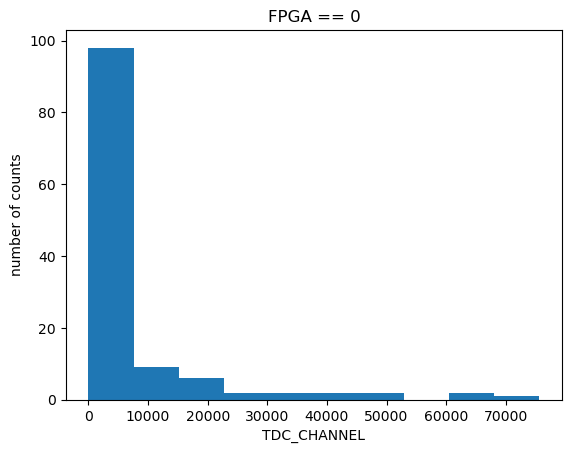

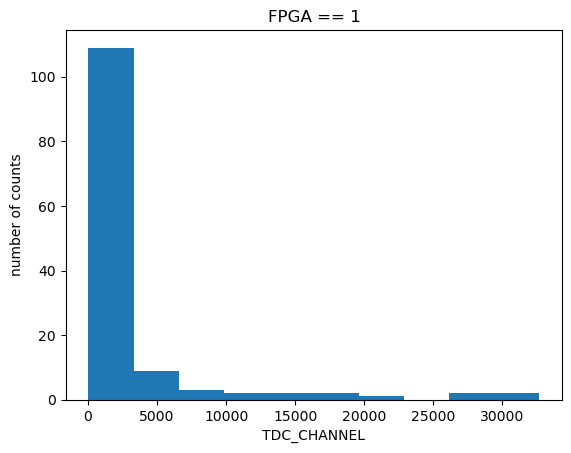

In [9]:
##9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv 
data = pd.read_csv('data/data_000637.txt')
FPGA_0 = pd.Series(data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
plt.hist(FPGA_0)
plt.title('FPGA == 0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('number of counts')
plt.show()
plt.hist(FPGA_1)
plt.title('FPGA == 1')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('number of counts')
plt.show()
